# Non-Photorealistic Rendering

This is following the instructions from the post [non-photorealistic-rendering-using-opencv-python-c](https://www.learnopencv.com/non-photorealistic-rendering-using-opencv-python-c/).

This post briefly present how to use available filters based on bilateral filtering.
In origami, the paper's bilateral filter functions can be used via the four functions below:

- edge-preserving-filter
- detail-enhance
- pencil-sketch
- stylization

In [1]:
(ns whispering-willow
  (:require
    [opencv4.core :refer :all]
    [opencv4.utils :as u]))

nil

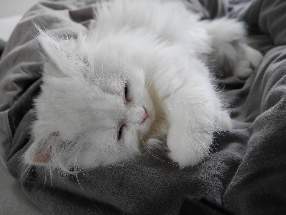

In [2]:
(def image (->  "resources/chapter02/emilie5.jpg" (imread)  (u/resize-by 0.07)))
(u/>>> image)

## Edge Preserving Filter

- *src*	Input 8-bit 3-channel image
- *dst*	Output 8-bit 3-channel image.	
- *flags*	Edge preserving filters. It takes value RECURS_FILTER ( Recursive Filtering ) = 1 and NORMCONV_FILTER ( Normalized Convolution ) = 2. Using RECURS_FILTER option is about 3.5x faster than NORMCONV_FILTER. The NORMCONV_FILTER produces sharpening of the edges and it good for applications like stylizations. When sharpening is not desirable, and speed is important RECURS_FILTER should be used.	
- *sigma_s*	Range between 0 to 200 (See details below)	
- *sigma_r*	Range between 0 to 1 (See details below)

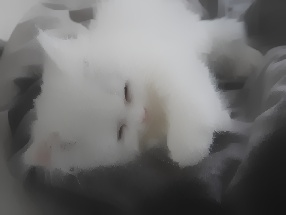

In [3]:
(-> image clone (edge-preserving-filter! 1 60 0.7) 
    (u/>>>))

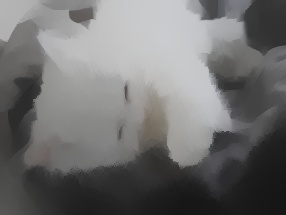

In [5]:
(-> image clone (edge-preserving-filter! 2 60 0.8) 
    (u/>>>))

## Detail Enhance

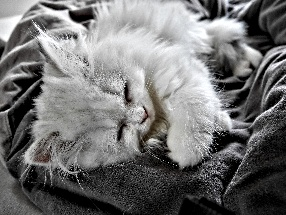

In [6]:
(-> image clone (detail-enhance! 10 0.15) (u/>>>))

## Pencil Sketch

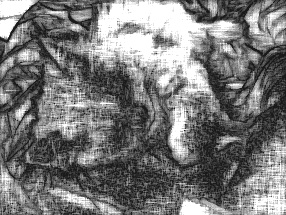

In [7]:
(-> image 
    clone 
    (pencil-sketch! (new-mat) 60 0.07 0.05)
    (u/>>>))

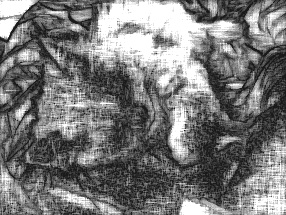

In [8]:
(def img3 (-> image clone))
(def dst_gray (new-mat))
(def dst_color (new-mat))

; pencil-sketch! is broken
(pencil-sketch img3 dst_gray dst_color 60 0.07 0.05)
(u/>>> dst_color)
(u/>>> dst_gray)

## Stylization

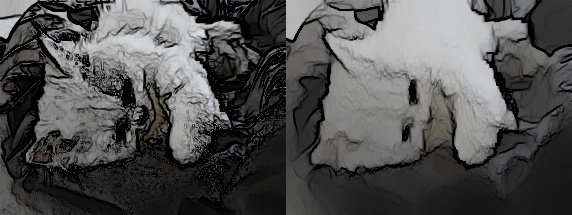

In [9]:
(-> [(-> image clone (stylization! 60 0.07)) 
     (-> image clone (stylization! 60 0.70))]
    (hconcat!)
    (u/>>>))

## Stylization on webcam stream

In [ ]:
;(u/simple-cam-window 
;  (fn[buffer] 
;    (-> buffer (u/resize-by 0.5) (stylization! 60 0.07))))